# Problem statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study
There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Read the data

leads = pd.read_csv("Leads.csv")

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#shape of the data

leads.shape

(9240, 37)

In [4]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the summary of the dataset

leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning and Preparation

In [8]:
# Check the number of missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [10]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
leads.drop(['City'], axis = 1, inplace = True)

In [12]:
# Same goes for the variable 'Country'

leads.drop(['Country'], axis = 1, inplace = True)

In [13]:
# Let's now check the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [15]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [16]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [20]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [21]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [23]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [24]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [25]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [26]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [27]:
# Check the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [28]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [29]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [31]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [32]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


In [33]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [34]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [35]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Data Modelling

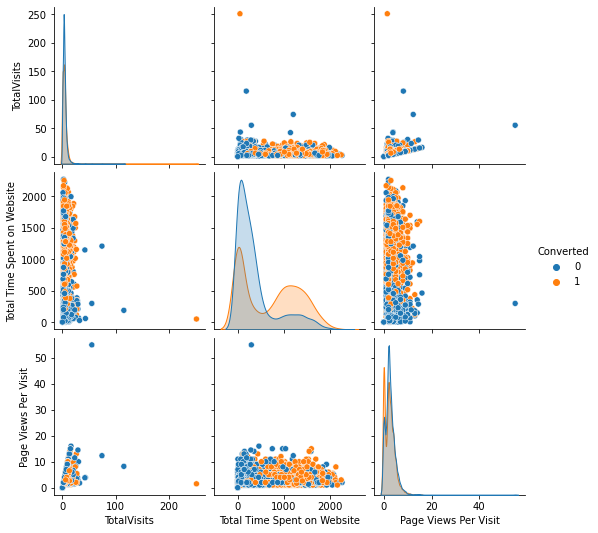

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

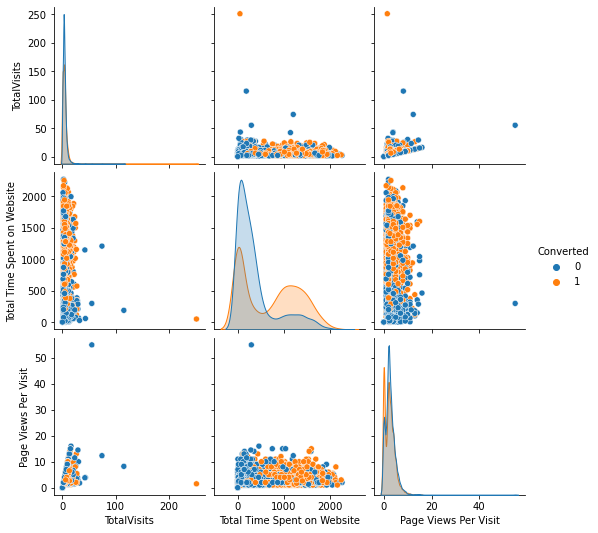

In [37]:
edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(edu,diag_kind='kde',hue='Converted')
plt.show()

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformededu = pd.DataFrame(pt.fit_transform(edu))
transformededu.columns = edu.columns
transformededu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


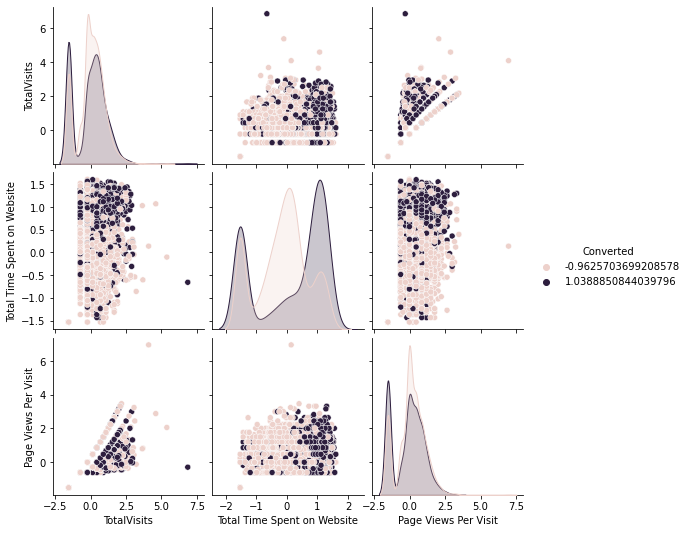

In [39]:
sns.pairplot(transformededu,diag_kind='kde',hue='Converted')
plt.show()

# Dummy variable creation

In [40]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
xleads = pd.concat([leads, dummy], axis=1)

In [42]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [43]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [44]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test-Train Split

In [45]:
# Import the required library

from sklearn.model_selection import train_test_split

In [46]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Put the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling

In [49]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [50]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Correlations

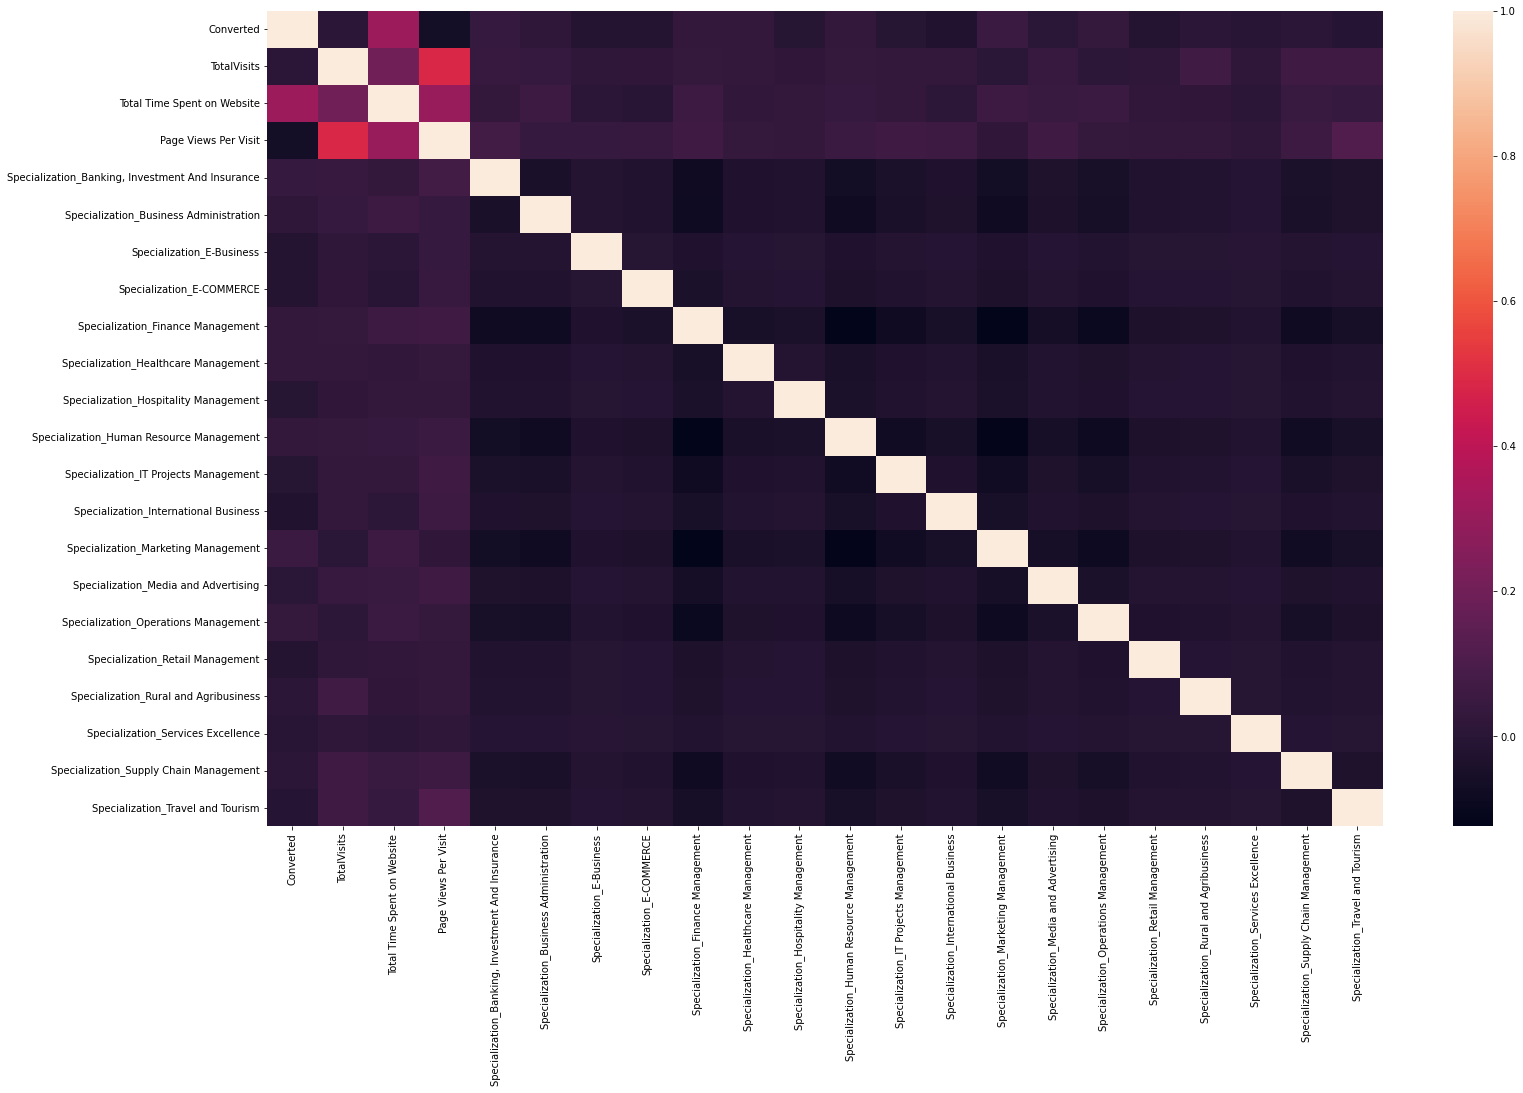

In [51]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

# Model Building

In [52]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [53]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [54]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_International Business', False, 2),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 2),
 ('Specialization_Operations Management', False, 2),
 ('Specialization_Retail Management', False, 2),
 ('Specialization_Rural and Agribusiness', False, 2),
 ('Specialization_Services Excellence', True, 1),
 ('Specialization_Supply Chain Management', False, 2),
 ('Speci

In [55]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [56]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [57]:
# Import statsmodels

import statsmodels.api as sm

In [58]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.3
Date:                Mon, 27 Feb 2023   Deviance:                       5536.5
Time:                        12:08:37   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1340
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4185      0.057     -7.373      0.000      -0.530      -0.307
TotalVisits                                          3.5290      2.220      1.590      0.112      -0.822       7.880
Total Time Spent on Website                          3.2903      0.154     21.420      0.000       2.989       3.591
Page Views Per Visit                                -4.1271      0.343    -12.024      0.000      -4.800      -3.454
Specialization_Banking, Investment And Insurance     0.8036      0.172      4.680      0.000       0.467       1.140
Specialization_Business Administration               0.2794      0.148      1.887      0.059      -0.011       0.569
Specialization_Finance Management                    0.2623      0.105      2.500      0.012       0.057       0.468
Specialization_Healthcare Management                 0.6194      0.238      2.606      0.009       0.154       1.085
Specialization_Human Resource Management             0.3209      0.108      2.973      0.003       0.109       0.532
Specialization_Marketing Management                  0.3882      0.109      3.567      0.000       0.175       0.602
Specialization_Services Excellence                  -0.5060      0.652     -0.776      0.438      -1.784       0.772
====================================================================================================================
"""

In [59]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.72
1,Total Time Spent on Website,1.95
0,TotalVisits,1.78
5,Specialization_Finance Management,1.16
7,Specialization_Human Resource Management,1.13
8,Specialization_Marketing Management,1.13
4,Specialization_Business Administration,1.07
3,"Specialization_Banking, Investment And Insurance",1.06
6,Specialization_Healthcare Management,1.03
9,Specialization_Services Excellence,1.01


In [61]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.3
Date:                Mon, 27 Feb 2023   Deviance:                       5536.5
Time:                        12:08:37   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1340
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4185      0.057     -7.373      0.000      -0.530      -0.307
TotalVisits                                          3.5290      2.220      1.590      0.112      -0.822       7.880
Total Time Spent on Website                          3.2903      0.154     21.420      0.000       2.989       3.591
Page Views Per Visit                                -4.1271      0.343    -12.024      0.000      -4.800      -3.454
Specialization_Banking, Investment And Insurance     0.8036      0.172      4.680      0.000       0.467       1.140
Specialization_Business Administration               0.2794      0.148      1.887      0.059      -0.011       0.569
Specialization_Finance Management                    0.2623      0.105      2.500      0.012       0.057       0.468
Specialization_Healthcare Management                 0.6194      0.238      2.606      0.009       0.154       1.085
Specialization_Human Resource Management             0.3209      0.108      2.973      0.003       0.109       0.532
Specialization_Marketing Management                  0.3882      0.109      3.567      0.000       0.175       0.602
Specialization_Services Excellence                  -0.5060      0.652     -0.776      0.438      -1.784       0.772
====================================================================================================================
"""

In [62]:
# The variable Lead Profile_Dual Specialization Student also needs to be dropped.

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.72
1,Total Time Spent on Website,1.95
0,TotalVisits,1.78
5,Specialization_Finance Management,1.16
7,Specialization_Human Resource Management,1.13
8,Specialization_Marketing Management,1.13
4,Specialization_Business Administration,1.07
3,"Specialization_Banking, Investment And Insurance",1.06
6,Specialization_Healthcare Management,1.03
9,Specialization_Services Excellence,1.01


In [63]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.3
Date:                Mon, 27 Feb 2023   Deviance:                       5536.5
Time:                        12:08:37   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1340
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4185      0.057     -7.373      0.000      -0.530      -0.307
TotalVisits                                          3.5290      2.220      1.590      0.112      -0.822       7.880
Total Time Spent on Website                          3.2903      0.154     21.420      0.000       2.989       3.591
Page Views Per Visit                                -4.1271      0.343    -12.024      0.000      -4.800      -3.454
Specialization_Banking, Investment And Insurance     0.8036      0.172      4.680      0.000       0.467       1.140
Specialization_Business Administration               0.2794      0.148      1.887      0.059      -0.011       0.569
Specialization_Finance Management                    0.2623      0.105      2.500      0.012       0.057       0.468
Specialization_Healthcare Management                 0.6194      0.238      2.606      0.009       0.154       1.085
Specialization_Human Resource Management             0.3209      0.108      2.973      0.003       0.109       0.532
Specialization_Marketing Management                  0.3882      0.109      3.567      0.000       0.175       0.602
Specialization_Services Excellence                  -0.5060      0.652     -0.776      0.438      -1.784       0.772
====================================================================================================================
"""

In [64]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.3
Date:                Mon, 27 Feb 2023   Deviance:                       5536.5
Time:                        12:08:37   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1340
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4185      0.057     -7.373      0.000      -0.530      -0.307
TotalVisits                                          3.5290      2.220      1.590      0.112      -0.822       7.880
Total Time Spent on Website                          3.2903      0.154     21.420      0.000       2.989       3.591
Page Views Per Visit                                -4.1271      0.343    -12.024      0.000      -4.800      -3.454
Specialization_Banking, Investment And Insurance     0.8036      0.172      4.680      0.000       0.467       1.140
Specialization_Business Administration               0.2794      0.148      1.887      0.059      -0.011       0.569
Specialization_Finance Management                    0.2623      0.105      2.500      0.012       0.057       0.468
Specialization_Healthcare Management                 0.6194      0.238      2.606      0.009       0.154       1.085
Specialization_Human Resource Management             0.3209      0.108      2.973      0.003       0.109       0.532
Specialization_Marketing Management                  0.3882      0.109      3.567      0.000       0.175       0.602
Specialization_Services Excellence                  -0.5060      0.652     -0.776      0.438      -1.784       0.772
====================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.72
1,Total Time Spent on Website,1.95
0,TotalVisits,1.78
5,Specialization_Finance Management,1.16
7,Specialization_Human Resource Management,1.13
8,Specialization_Marketing Management,1.13
4,Specialization_Business Administration,1.07
3,"Specialization_Banking, Investment And Insurance",1.06
6,Specialization_Healthcare Management,1.03
9,Specialization_Services Excellence,1.01


# Model Evaluation

In [66]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.314081
218     0.309527
4171    0.145687
4037    0.396878
3660    0.461042
207     0.246112
2044    0.408788
6411    0.829614
6498    0.569175
2085    0.396878
dtype: float64

In [67]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31408064, 0.30952674, 0.14568651, 0.39687844, 0.46104165,
       0.24611164, 0.4087884 , 0.82961449, 0.56917496, 0.39687844])

In [68]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.314081
1,0,0.309527
2,1,0.145687
3,1,0.396878
4,1,0.461042


In [69]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.314081,0
1,0,0.309527,0
2,1,0.145687,0
3,1,0.396878,0
4,1,0.461042,0


In [70]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [71]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1818  494]
 [1037 1112]]


In [72]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [73]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.6568034073077785


In [74]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Calculate the sensitivity

TP/(TP+FN)

0.5174499767333643

In [76]:
# Calculate the sensitivity

TP/(TP+FN)

0.5174499767333643

# Finding the Optimal values

In [77]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [79]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

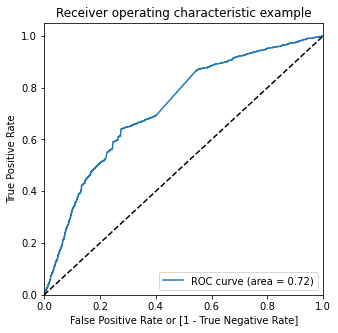

In [80]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [81]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.314081,0,1,1,1,1,0,0,0,0,0,0
1,0,0.309527,0,1,1,1,1,0,0,0,0,0,0
2,1,0.145687,0,1,1,0,0,0,0,0,0,0,0
3,1,0.396878,0,1,1,1,1,0,0,0,0,0,0
4,1,0.461042,0,1,1,1,1,1,0,0,0,0,0


In [82]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.485093  0.997673  0.008651
0.2   0.2  0.507510  0.986971  0.061851
0.3   0.3  0.564896  0.946021  0.210640
0.4   0.4  0.646268  0.689158  0.606401
0.5   0.5  0.656803  0.517450  0.786332
0.6   0.6  0.644026  0.403443  0.867647
0.7   0.7  0.603452  0.268962  0.914360
0.8   0.8  0.549653  0.101908  0.965830
0.9   0.9  0.519390  0.006049  0.996540


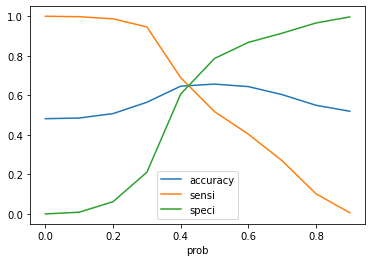

In [83]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.314081,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.309527,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.145687,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.396878,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.461042,0,1,1,1,1,1,0,0,0,0,0,1


In [85]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6599417171037884

In [86]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1506,  806],
       [ 711, 1438]], dtype=int64)

In [87]:
# Calculate Sensitivity

TP/(TP+FN)

0.5174499767333643

In [88]:
# Calculate Specificity

TN/(TN+FP)

0.7863321799307958

# Predictions on the data set

In [89]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [90]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Services Excellence
4771,0.000000,0.000000,0.0000,0,0,0,0,0,0,0
6122,0.027888,0.029049,0.4375,0,0,0,0,1,0,0
9202,0.015936,0.416813,0.2500,0,0,1,0,0,0,0
6570,0.011952,0.378961,0.1875,0,1,0,0,0,0,0
2668,0.031873,0.395246,0.2500,0,0,0,0,0,0,0


In [91]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [92]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Services Excellence
4771,1.0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0
6122,1.0,0.027888,0.029049,0.43750,0,0,0,0,1,0,0
9202,1.0,0.015936,0.416813,0.25000,0,0,1,0,0,0,0
6570,1.0,0.011952,0.378961,0.18750,0,1,0,0,0,0,0
2668,1.0,0.031873,0.395246,0.25000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0.09375,0,1,0,0,0,0,0
6583,1.0,0.011952,0.152289,0.18750,0,0,0,0,0,0,0
5531,1.0,0.055777,0.702025,0.87500,0,0,0,0,0,0,0
3056,1.0,0.011952,0.417694,0.18750,0,0,0,0,0,1,0


In [93]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [94]:
y_test_pred[:10]

4771    0.396878
6122    0.153265
9202    0.559654
6570    0.592935
2668    0.490675
4233    0.461042
3368    0.804358
9091    0.644107
5972    0.308981
3631    0.506517
dtype: float64

In [95]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [96]:
# Let's see the head

y_pred_1.head()

,0
4771,0.396878
6122,0.153265
9202,0.559654
6570,0.592935
2668,0.490675


In [97]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [98]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [100]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.396878
1,0,0.153265
2,0,0.559654
3,1,0.592935
4,1,0.490675


In [101]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [102]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.396878
1,0,0.153265
2,0,0.559654
3,1,0.592935
4,1,0.490675


In [103]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [104]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.396878,0
1,0,0.153265,0
2,0,0.559654,1
3,1,0.592935,1
4,1,0.490675,1


In [105]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6710251046025104

In [106]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[666, 330],
       [299, 617]], dtype=int64)

In [107]:
# Calculate sensitivity
TP / float(TP+FN)

0.5174499767333643

In [108]:
# Calculate specificity
TN / float(TN+FP)

0.7863321799307958

# Precision-Recall View

In [109]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1818,  494],
       [1037, 1112]], dtype=int64)

In [110]:
# Precision
TP / TP + FP

495.0

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6924034869240349

In [112]:
# Recall
TP / TP + FN

1038.0

In [113]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5174499767333643

# Precision and Recall  

In [114]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4456    0
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

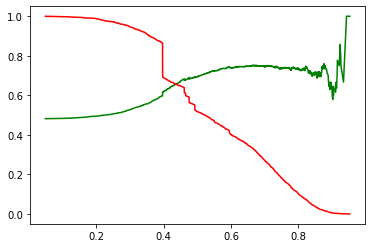

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.314081,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.309527,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.145687,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.396878,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.461042,0,1,1,1,1,1,0,0,0,0,0,1


In [118]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6707016364043936

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1587,  725],
       [ 744, 1405]], dtype=int64)

In [120]:
# Calculate Precision

TP/(TP+FP)

0.6924034869240349

In [121]:
# Calculate Recall

TP/(TP+FN)

0.5174499767333643

# Predictions on the Test Set

In [122]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [123]:
y_test_pred[:10]

4771    0.396878
6122    0.153265
9202    0.559654
6570    0.592935
2668    0.490675
4233    0.461042
3368    0.804358
9091    0.644107
5972    0.308981
3631    0.506517
dtype: float64

In [124]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
y_pred_1.head()

,0
4771,0.396878
6122,0.153265
9202,0.559654
6570,0.592935
2668,0.490675


In [126]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [127]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.396878,0
1,0,0.153265,0
2,0,0.559654,1
3,1,0.592935,1
4,1,0.490675,1


In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[666, 330],
       [299, 617]], dtype=int64)

In [129]:
# Calculate Precision

TP/(TP+FP)

0.6924034869240349

In [130]:
# Calculate Recall

TP/(TP+FN)

0.5174499767333643

# Summary: 
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion. First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted. Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects. Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses